In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

## Download the flower_photos dataset

In [2]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

--2021-11-02 18:53:21--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   112MB/s    in 2.0s    

2021-11-02 18:53:24 (112 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



## Unzip the dataset

In [3]:
!tar -xzvf "flower_photos.tgz" -C "." > xx
print("Unzipped")

Unzipped


## Load images

In [4]:
import cv2
import os
def load_img(indir):
    samples = []
    labels = []
    for class_dir in os.listdir(indir):
        if not os.path.isdir(indir+'/'+class_dir): 
          continue
        print("Loading:",class_dir)
        the_class = class_dir
        for file in os.listdir(indir+'/'+class_dir):
            image = cv2.imread("{}/{}/{}".format(indir,class_dir,file))
            image = cv2.resize(image, (64,64))
            samples.append(image)
            labels.append(the_class)
    samples = np.array(samples)
    labels = np.array(labels)
    return samples,labels
samples, labels = load_img('flower_photos')
print('loaded',len(samples),' samples')
print('classes',set(labels))
org_samples = samples
org_labels = labels

Loading: tulips
Loading: sunflowers
Loading: daisy
Loading: dandelion
Loading: roses
loaded 3670  samples
classes {'roses', 'dandelion', 'daisy', 'sunflowers', 'tulips'}


## Show examples

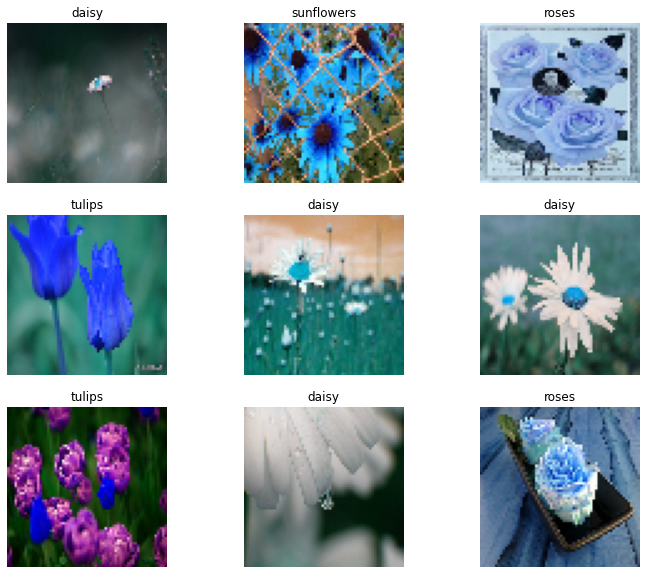

In [5]:
import matplotlib.pyplot as plt
import random
    
plt.figure(figsize=(12, 10))
for i in range(9):
    n = random.randrange(len(samples))
    plt.subplot(3, 3, i + 1)
    plt.imshow(samples[n])
    plt.title(labels[n])
    plt.axis("off")

## Create a simple ANN model

In [6]:
model = Sequential()
model.add(Dense(50, input_dim=12288, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                614450    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 255       
Total params: 619,805
Trainable params: 619,805
Non-trainable params: 0
_________________________________________________________________


## Flatten samples

In [7]:
samples = org_samples.copy()
labels = org_labels.copy()
print("Samples shape before",samples.shape)

# flatten samples
samples = np.reshape(samples,newshape=(3670,-1))
print("Samples shape flattened",samples.shape)

Samples shape before (3670, 64, 64, 3)
Samples shape flattened (3670, 12288)


## One-hot labels

In [8]:
# one-hot labels
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print("Labels shape",labels.shape)
labels = labels.astype(float)

Labels shape (3670, 5)


## Train model

In [ ]:
#samples = org_samples
print(samples.shape)
import sklearn.model_selection
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels,random_state=22)
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

(3670, 64, 64, 3)


In [ ]:
H = model.fit(trainSamples, trainLabels, epochs=10, validation_data=(testSamples,testLabels))    

Epoch 1/10
86/86 [==============================] - 9s 101ms/step - loss: 2.7815 - accuracy: 0.4375 - val_loss: 1.4809 - val_accuracy: 0.4292
Epoch 2/10
86/86 [==============================] - 9s 106ms/step - loss: 1.0741 - accuracy: 0.5727 - val_loss: 1.1120 - val_accuracy: 0.5523
Epoch 3/10
86/86 [==============================] - 9s 110ms/step - loss: 0.9662 - accuracy: 0.6152 - val_loss: 1.1461 - val_accuracy: 0.5545
Epoch 4/10
86/86 [==============================] - 10s 114ms/step - loss: 0.9044 - accuracy: 0.6493 - val_loss: 1.0265 - val_accuracy: 0.5904
Epoch 5/10
86/86 [==============================] - 10s 118ms/step - loss: 0.8108 - accuracy: 0.6933 - val_loss: 1.2136 - val_accuracy: 0.5643
Epoch 6/10
86/86 [==============================] - 10s 120ms/step - loss: 0.7135 - accuracy: 0.7231 - val_loss: 1.0045 - val_accuracy: 0.6057
Epoch 7/10
86/86 [==============================] - 11s 130ms/step - loss: 0.6469 - accuracy: 0.7533 - val_loss: 1.1405 - val_accuracy: 0.5610
Ep

## Show results

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
testResults = model.predict(testSamples)

print(confusion_matrix(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print(classification_report(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))
print("Accuracy: ",accuracy_score(testLabels.argmax(axis=1), testResults.argmax(axis=1)))


[[  0 171   0   0   0]
 [  0 216   0   0   0]
 [  0 157   0   0   0]
 [  0 165   0   0   0]
 [  0 209   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       171
           1       0.24      1.00      0.38       216
           2       0.00      0.00      0.00       157
           3       0.00      0.00      0.00       165
           4       0.00      0.00      0.00       209

    accuracy                           0.24       918
   macro avg       0.05      0.20      0.08       918
weighted avg       0.06      0.24      0.09       918

Cohen's Kappa: 0.0
Accuracy:  0.23529411764705882


C:\programs\miniconda3\envs\deep\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## DecisionTree classifier (for comparison)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier()
treemodel.fit(trainSamples, trainLabels)
treeResults = treemodel.predict(testSamples)    

print(confusion_matrix(testLabels.argmax(axis=1), treeResults.argmax(axis=1)))
print(classification_report(testLabels.argmax(axis=1), treeResults.argmax(axis=1)))
treeAcc = accuracy_score(testLabels.argmax(axis=1), treeResults.argmax(axis=1)) 
print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabels.argmax(axis=1), treeResults.argmax(axis=1))))
print("Tree Accuracy: {:.2f}".format(treeAcc))

[[60 52 22 19 18]
 [27 93 32 28 36]
 [20 33 56 12 36]
 [22 33 17 69 24]
 [24 48 48 33 56]]
              precision    recall  f1-score   support

           0       0.39      0.35      0.37       171
           1       0.36      0.43      0.39       216
           2       0.32      0.36      0.34       157
           3       0.43      0.42      0.42       165
           4       0.33      0.27      0.30       209

    accuracy                           0.36       918
   macro avg       0.37      0.36      0.36       918
weighted avg       0.36      0.36      0.36       918

Cohen's Kappa: 0.20108129534890995
Tree Accuracy: 0.36


## kNN classifier (for comparison)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier()
knnmodel.fit(trainSamples, trainLabels)
knnResults = knnmodel.predict(testSamples)    
print(confusion_matrix(testLabels.argmax(axis=1), knnResults.argmax(axis=1)))
print(classification_report(testLabels.argmax(axis=1), knnResults.argmax(axis=1)))
knnAcc = accuracy_score(testLabels.argmax(axis=1), knnResults.argmax(axis=1)) 
print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabels.argmax(axis=1), knnResults.argmax(axis=1))))
print("kNN Accuracy: {:.2f}".format(knnAcc))

[[ 28 124   3   0   0]
 [ 28 174   4   3   0]
 [ 49  98  23   1   4]
 [ 43  98   3  29   0]
 [ 54 132  10   4   6]]
              precision    recall  f1-score   support

           0       0.14      0.18      0.16       155
           1       0.28      0.83      0.42       209
           2       0.53      0.13      0.21       175
           3       0.78      0.17      0.28       173
           4       0.60      0.03      0.06       206

    accuracy                           0.28       918
   macro avg       0.47      0.27      0.22       918
weighted avg       0.47      0.28      0.23       918

Cohen's Kappa: 0.09110825556655644
kNN Accuracy: 0.28


## CNN Model

In [ ]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same",input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dense(5))
model.add(Activation("softmax"))

model.summary()
optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)       